In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

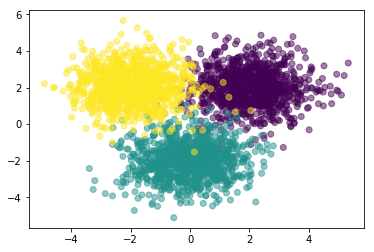

In [2]:
D = 2
K = 3
N = int(K*1e3)

X0 = np.random.randn((N//K),D) + np.array([2,2])
X1 = np.random.randn((N//K),D) + np.array([0,-2])
X2 = np.random.randn((N//K),D) + np.array([-2,2])
X = np.vstack((X0,X1,X2))

y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))

plt.figure()
plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.5)

In [3]:
def one_hot_encode(y):
    N = len(y)
    K = len(set(y))
    
    Y = np.zeros((N,K))
    
    for i in range(N):
        Y[i,y[i]] = 1
        
    return Y

def softmax(H):
    eH = np.exp(H)
    return eH/eH.sum(axis = 1, keepdims = True)

def ReLU(H):
    return H*(H > 0)

def feed_forward(X,W1,b1,W2,b2,W3,b3,W4,b4,W5,b5,W6,b6):
    Z1 = ReLU(np.matmul(X,W1) + b1)
    Z2 = ReLU(np.matmul(Z1,W2) + b2)
    Z3 = ReLU(np.matmul(Z2,W3) + b3)
    Z4 = ReLU(np.matmul(Z3,W4) + b4)
    Z5 = ReLU(np.matmul(Z4,W5) + b5)
    P_hat = softmax(np.matmul(Z5,W6) + b6)
    return Z1, Z2, Z3, Z4, Z5, P_hat

def cross_entropy(Y, P_hat):
    return -np.sum(Y*np.log(P_hat))

def accuracy(y, P_hat):
    return np.mean(y == P_hat.argmax(axis = 1))

In [4]:
Y = one_hot_encode(y)

In [18]:
M1 = 8
M2 = 8
M3 = 8
M4 = 8
M5 = 8

W1 = np.random.randn(D,M1)
b1 = np.random.randn(M1)
W2 = np.random.randn(M1,M2)
b2 = np.random.randn(M2)
W3 = np.random.randn(M2,M3)
b3 = np.random.randn(M3)
W4 = np.random.randn(M3,M4)
b4 = np.random.randn(M4)
W5 = np.random.randn(M4,M5)
b5 = np.random.randn(M5)
W6 = np.random.randn(M5,K)
b6 = np.random.randn(K)

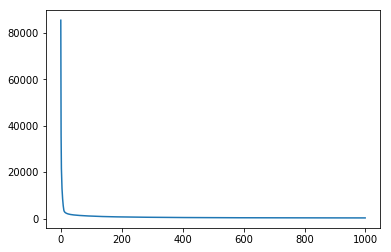

In [19]:
eta = 3e-6
epochs = int(1e3)
J = np.zeros(epochs)

for epoch in range(epochs):
    Z1, Z2, Z3, Z4, Z5, P_hat = feed_forward(X,W1,b1,W2,b2,W3,b3,W4,b3,W5,b5,W6,b6)
    J[epoch] = cross_entropy(Y,P_hat)
    
    dH6 = P_hat - Y
    dW6 = np.matmul(Z5.T,dH6)
    db6 = dH6.sum(axis = 0)
    W6 -= eta*dW6
    b6 -= eta*db6
    
    dZ5 = np.matmul(dH6,W6.T)
    dH5 = dZ5*(Z5 > 0)
    dW5 = np.matmul(Z4.T,dH5)
    db5 = dH5.sum(axis = 0)
    W5 -= eta*dW5
    b5 -= eta*db5
    
    dZ4 = np.matmul(dH5,W5.T)
    dH4 = dZ4*(Z4 > 0)
    dW4 = np.matmul(Z3.T,dH4)
    db4 = dH4.sum(axis = 0)
    W4 -= eta*dW4
    b4 -= eta*db4
    
    dZ3 = np.matmul(dH4,W4.T)
    dH3 = dZ3*(Z3 > 0)
    dW3 = np.matmul(Z2.T,dH3)
    db3 = dH3.sum(axis = 0)
    W3 -= eta*dW3
    b3 -= eta*db3
    
    dZ2 = np.matmul(dH3,W3.T)
    dH2 = dZ2*(Z2 > 0)
    dW2 = np.matmul(Z1.T,dH2)
    db2 = dH2.sum(axis = 0)
    W2 -= eta*dW2
    b2 -= eta*db2
    
    dZ1 = np.matmul(dH2,W2.T)
    dH1 = dZ1*(Z1 > 0)
    dW1 = np.matmul(X.T,dH1)
    db1 = dH1.sum(axis = 0)
    W1 -= eta*dW1
    b1 -= eta*db1
    
plt.figure()
plt.plot(J)

In [20]:
print("Accuracy: {:0.4f}".format(accuracy(y,P_hat)))

Accuracy: 0.9620
